MUSIC_Search Practice

### TF-IDF練習:使用2017年國慶小提琴新聞

In [27]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

### 從指定路徑中讀入新聞資料

In [28]:
text_list = read_text_folder("./data/")
print("document number:", len(text_list))

document number: 10


### 製作詞頻矩陣
下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的`fintextmin`函式

In [6]:
## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
# stopwords = [] 
# dwc = count_words_in_documents(doc_list = text_list,
#                               doc_names = range(len(text_list)),
#                                stopwords = stopwords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 1.025 seconds.
Prefix dict has been built succesfully.


In [7]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('\ufeff', 1),
 ('今年', 1),
 ('國慶煙火', 1),
 ('首次', 1),
 ('在', 12),
 ('台東', 1),
 ('舉辦', 1),
 ('，', 57),
 ('同時', 1),
 ('更', 3)]

In [8]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,地,琴弓,不得,沾著,大,周延,必須,即,正銘,直接,...,論壇,放什麼,正向,沒演,發展,表演,雨衣,﻿,文怒,覺得
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0
7,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### 製作TF-IDF矩陣
可以將完成後的tf-idf矩陣與上面的詞頻矩陣比較一下係數

In [9]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
 #df_tfidf = evaluate_tfidf(wfm) 

,地,琴弓,不得,沾著,大,周延,必須,即,正銘,直接,...,論壇,放什麼,正向,沒演,發展,表演,雨衣,﻿,文怒,覺得
0,0.028292,0.000000,0.036373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.042788,0.042788,0.000000,0.036373,0.000000,0.045939,0.031822,0.015819,0.000000,0.000000
1,0.056406,0.000000,0.000000,0.085304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.072516,0.000000,0.000000,0.000000,0.031539,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.073071,0.000000,0.025162,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.063725,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.045997,0.000000,0.031679,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.047385,0.000000,0.047385,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017519,0.000000,0.000000
5,0.041867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063317,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.033991,0.047091,0.023410,0.063317,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.136395,0.000000,0.023484,0.000000,0.000000
7,0.000000,0.081573,0.069344,0.000000,0.000000,0.000000,0.060668,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060668,0.030159,0.000000,0.000000
8,0.022782,0.000000,0.000000,0.000000,0.025624,0.000000,0.025624,0.000000,0.000000,0.034453,...,0.000000,0.000000,0.034453,0.000000,0.034453,0.018496,0.000000,0.012738,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.040059,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019914,0.000000,0.053862


In [10]:
wfm
N = len(text_list)
dfif = wfm > 0
df = dfif.sum(axis=0)

import math

out = N/df

logdf = [math.log10(i) for i in out.values]
for i in range(1,N):
    df_tfidf[:i] = wfm[:i] * logdf

### 視覺化TFIDF和原本詞頻矩陣的差異

這邊我們取第一篇文章來比較看看調整前後的詞彙係數

In [11]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('地', 1.0),
 ('琴弓', 0.0),
 ('不得', 1.0),
 ('沾著', 0.0),
 ('大', 0.0),
 ('周延', 0.0),
 ('必須', 0.0),
 ('即', 0.0),
 ('正銘', 0.0),
 ('直接', 0.0)]

### 文字雲

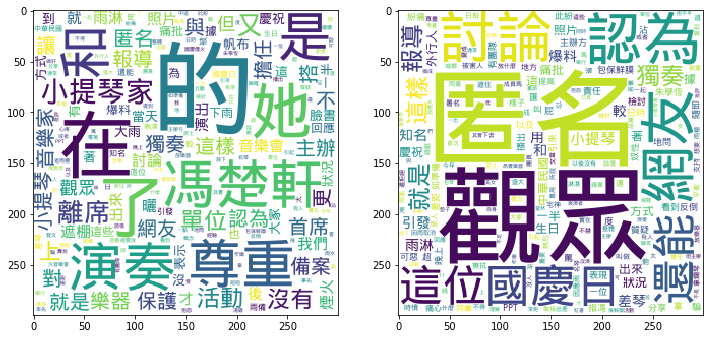

In [29]:
linux_font = r'wqy-microhei.ttc'
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2,font_path=linux_font,  height=300, width=300) 

### 長條圖
可以發現，經過TF-IDF處理之後，好像也沒有變得更清楚RRRRRRRRRRRRR
該檢討一下自己QAQ

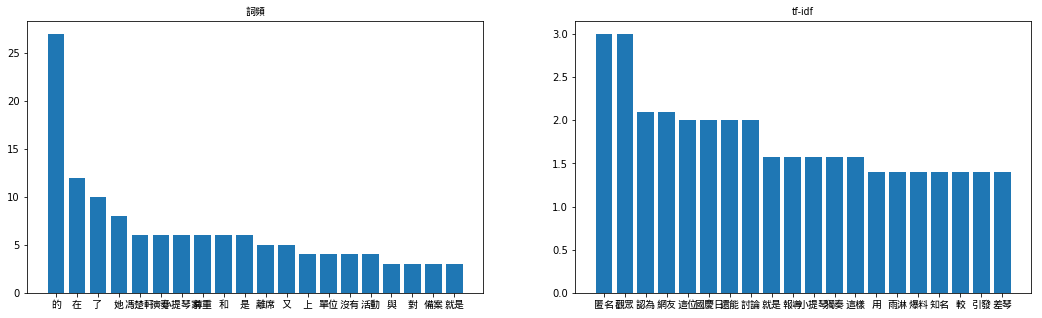

In [28]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf") 